In [2]:

import xarray as xr
import matplotlib.pyplot as plt

# Paths to NetCDF files
coarse_tp_path = '/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5/tp_ERA5_2017_2019.nc'
fine_t2m_path = '/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Fine_ERA5/t2m_ERA5Land_2017_2019.nc'

# Load datasets
ds_tp = xr.open_dataset(coarse_tp_path)
ds_t2m = xr.open_dataset(fine_t2m_path)

# Print summaries
print("📦 ERA5 (Coarse) — Total Precipitation")
print(ds_tp)
print("\n📦 ERA5-Land (Fine) — 2m Temperature")
print(ds_t2m)

# Pick a central point (e.g., nearest to 27.625°N, 85.375°E)
center_lat = 27.625
center_lon = 85.375

# --- Plot time series at central grid point ---
tp_series = ds_tp['tp'].sel(latitude=center_lat, longitude=center_lon, method='nearest')
t2m_series = ds_t2m['t2m'].sel(latitude=center_lat, longitude=center_lon, method='nearest')

plt.figure(figsize=(14, 5))
plt.plot(tp_series['time'], tp_series, label='TP (ERA5)')
plt.title("📈 Total Precipitation (ERA5) at Central Point")
plt.xlabel("Date")
plt.ylabel("Precipitation (m)")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(t2m_series['time'], t2m_series - 273.15, label='T2M (ERA5-Land)', color='orange')  # Convert K to °C
plt.title("📈 2m Temperature (ERA5-Land) at Central Point")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.legend()
plt.show()

# --- Spatial plot on a specific date ---
sample_date = '2017-07-15T12:00:00'

tp_map = ds_tp['tp'].sel(time=sample_date)
t2m_map = ds_t2m['t2m'].sel(time=sample_date)

tp_map.plot(cmap='Blues', figsize=(6, 5), title='🗺️ ERA5 Precipitation on ' + sample_date)
plt.show()

(t2m_map - 273.15).plot(cmap='coolwarm', figsize=(6, 5), title='🗺️ ERA5-Land 2m Temp on ' + sample_date)
plt.show()


ValueError: did not find a match in any of xarray's currently installed IO backends ['h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

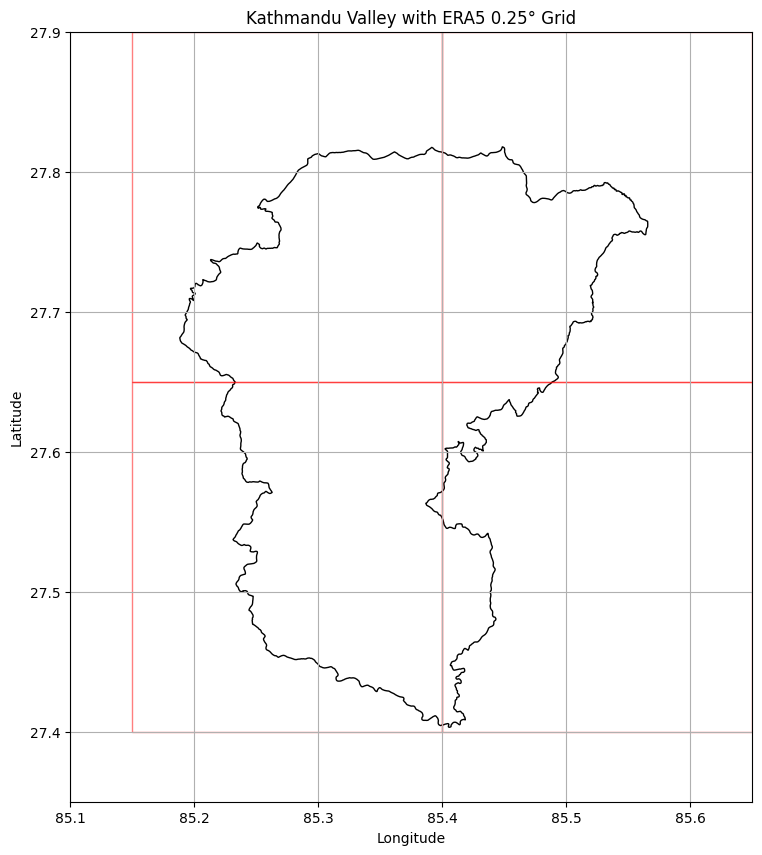

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load Kathmandu Valley shapefile
shapefile_path = "/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp"
kathmandu_gdf = gpd.read_file(shapefile_path)

# Define ERA5 0.25° grid bounding box
lon_min, lon_max = 85.15, 85.6
lat_min, lat_max = 27.4, 27.85
grid_size = 0.25

# Generate grid coordinates
lons = np.arange(lon_min, lon_max, grid_size)
lats = np.arange(lat_min, lat_max, grid_size)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
kathmandu_gdf.plot(ax=ax, facecolor='none', edgecolor='black')

# Draw grid boxes
for lon in lons:
    for lat in lats:
        rect = plt.Rectangle((lon, lat), grid_size, grid_size,
                             linewidth=1, edgecolor='red', facecolor='none', alpha=0.5)
        ax.add_patch(rect)

ax.set_title("Kathmandu Valley with ERA5 0.25° Grid")
ax.set_xlim(lon_min - 0.05, lon_max + 0.05)
ax.set_ylim(lat_min - 0.05, lat_max + 0.05)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


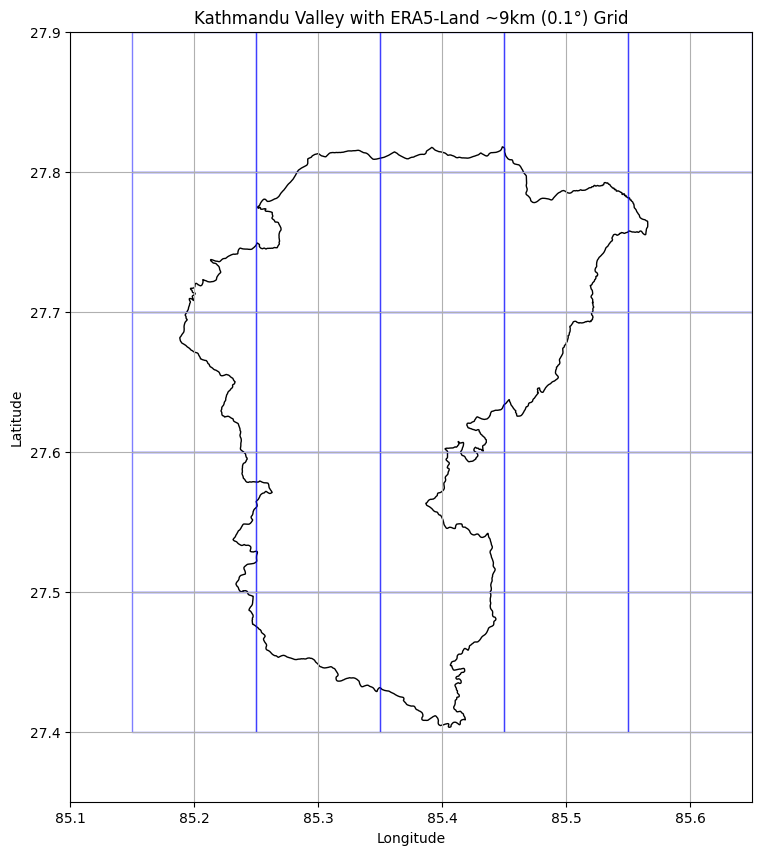

In [4]:
# Define finer ~9 km grid (≈0.1° resolution)
fine_grid_size = 0.1
fine_lons = np.arange(lon_min, lon_max, fine_grid_size)
fine_lats = np.arange(lat_min, lat_max, fine_grid_size)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
kathmandu_gdf.plot(ax=ax, facecolor='none', edgecolor='black')

# Draw finer grid boxes
for lon in fine_lons:
    for lat in fine_lats:
        rect = plt.Rectangle((lon, lat), fine_grid_size, fine_grid_size,
                             linewidth=1, edgecolor='blue', facecolor='none', alpha=0.5)
        ax.add_patch(rect)

ax.set_title("Kathmandu Valley with ERA5-Land ~9km (0.1°) Grid")
ax.set_xlim(lon_min - 0.05, lon_max + 0.05)
ax.set_ylim(lat_min - 0.05, lat_max + 0.05)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
